# Data Analysis: Generate Insights Like A Pro In 7 Steps
### Step 1: Understanding the business problem.
### Step 2: Analyze data requirements.
### Step 3: Data understanding and collection (Data Gathering)
### Step 4: Data Preparation (Data Transformation)
> Data is usually inclusive of missing values, inaccuracies, and other errors. Hence error correction, verifying the data quality, and joining the data sets together are a big part of the data preparation process.

#### The additional two steps of data preparation are:

1. Converting the collected data to a structured format with all required elements.
2. Cleaning it to remove unwanted substances.
3. Data Modelling (ERD)

### Step 5: Data Visualization.
### Step 6: Data Analysis.
### Step 7: Deployment.

In [1]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# 1. Data Gathering, Transformation & Explanation

## *1.1. Reading first <.json> format file from local path*

In [2]:
# Opening JSON file
f = open("/home/gaurav/Documents/Python/data/YouTube(IN)/IN_category_id.json")
  
# returns JSON object as a dictionary
data = json.load(f)

# Creating Dataframe of json data
df01 = pd.DataFrame(data)
df01.head(2)

,kind,etag,items
0,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."


### Creating Dataframe after flattening json data

In [3]:
df1 = pd.json_normalize(data,record_path=['items'])
df1.head(2)

,kind,etag,id,snippet.title,snippet.assignable,snippet.channelId
0,youtube#videoCategory,IfWa37JGcqZs-jZeAyFGkbeh6bc,1,Film & Animation,True,UCBR8-60-B28hp2BmDPdntcQ
1,youtube#videoCategory,5XGylIs7zkjHh5940dsT5862m1Y,2,Autos & Vehicles,True,UCBR8-60-B28hp2BmDPdntcQ


### Dropping columns unwanted for analysis

In [4]:
df1.drop(['kind', 'etag', 'snippet.assignable','snippet.channelId'], axis=1, inplace=True)

### Renaming Columns

In [5]:
df1.rename(columns = {'id':'categoryId','snippet.title':'categoryTitle'}, inplace = True)
df1.head(2)

,categoryId,categoryTitle
0,1,Film & Animation
1,2,Autos & Vehicles


### Let's store final usable data into "category" dataframe

In [6]:
category = df1
category.head(2)

,categoryId,categoryTitle
0,1,Film & Animation
1,2,Autos & Vehicles


### Basic Analysis about category dataframe

In [7]:
category.shape

(31, 2)

In [8]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   categoryId     31 non-null     object
 1   categoryTitle  31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


In [9]:
category.describe()

,categoryId,categoryTitle
count,31,31
unique,31,30
top,1,Comedy
freq,1,2


In [10]:
category.nunique()

categoryId       31
categoryTitle    30
dtype: int64

In [11]:
# Print categories name (unique)

category['categoryTitle'].unique()

array(['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals',
       'Sports', 'Short Movies', 'Travel & Events', 'Gaming',
       'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment',
       'News & Politics', 'Howto & Style', 'Education',
       'Science & Technology', 'Movies', 'Anime/Animation',
       'Action/Adventure', 'Classics', 'Documentary', 'Drama', 'Family',
       'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts',
       'Shows', 'Trailers'], dtype=object)

In [12]:
# Check duplicates

category.duplicated().sum()

0

There is no duplicate rows in this dataframe.

In [13]:
# Check null values

category.isnull().sum()

categoryId       0
categoryTitle    0
dtype: int64

There is no null values in both columns of dataframe.

## *1.2. Reading second .csv format file from local path*

In [14]:
df2 = pd.read_csv("/home/gaurav/Documents/Python/data/YouTube(IN)/IN_youtube_trending_data.csv") 

In [15]:
df2.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...


In [16]:
df2.shape

(164954, 16)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164954 entries, 0 to 164953
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           164954 non-null  object
 1   title              164954 non-null  object
 2   publishedAt        164954 non-null  object
 3   channelId          164954 non-null  object
 4   channelTitle       164953 non-null  object
 5   categoryId         164954 non-null  int64 
 6   trending_date      164954 non-null  object
 7   tags               164954 non-null  object
 8   view_count         164954 non-null  int64 
 9   likes              164954 non-null  int64 
 10  dislikes           164954 non-null  int64 
 11  comment_count      164954 non-null  int64 
 12  thumbnail_link     164954 non-null  object
 13  comments_disabled  164954 non-null  bool  
 14  ratings_disabled   164954 non-null  bool  
 15  description        147974 non-null  object
dtypes: bool(2), int64(5)

In [18]:
df2.nunique()

video_id              50304
title                 50933
publishedAt           49832
channelId              3980
channelTitle           4130
categoryId               15
trending_date           840
tags                  31502
view_count           160659
likes                109478
dislikes              17039
comment_count         27688
thumbnail_link        50305
comments_disabled         2
ratings_disabled          2
description           42517
dtype: int64

In [19]:
df2.isnull().sum()

video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          16980
dtype: int64

Here, We can see channelTitle column has 1 null value and description column has 16980 null values. 

In [20]:
df2.duplicated().sum()

75

Total duplicate rows are 75.

In [21]:
df2['video_id'].duplicated().sum()

114650

In [22]:
# To print rows with duplication

df2[df2.duplicated()].head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
223,cRPCXy1i2IY,Jatt Jaffe (Official Video) Jassa Dhillon - Gu...,2020-08-10T04:31:01Z,UColNRmGBE3dNzJ89zZZOh2Q,Brown Town Music,10,2020-08-13T00:00:00Z,jatt jaffe|jatt jaffe jassa dhillon|jatt jaffe...,4987494,139202,2068,16633,https://i.ytimg.com/vi/cRPCXy1i2IY/default.jpg,False,False,Brown Town Music Presents New Song Jatt Jaffe ...
277,vUzXlHG0UVY,We got LOST in CLOUDS | LONAVALA vlog series ...,2020-08-13T06:39:33Z,UChZ0JmGgyOWSU-1iXxPhsVA,Sambhavna Seth Entertainment,22,2020-08-13T00:00:00Z,sambhavnaseth|ss vlogs|hindi vlogger|celebrity...,594245,58853,741,4133,https://i.ytimg.com/vi/vUzXlHG0UVY/default.jpg,False,False,For any queries or feedback please mail us to ...


### Dropping duplicate columns

In [23]:
df2.drop_duplicates(inplace = True)

### Renaming Columns

In [24]:
df2.rename(columns = {'title':'videoTitle'}, inplace = True)

### Next, Let's store final usable data into "video" dataframe.

In [25]:
video = df2
video.head(2)

,video_id,videoTitle,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...


## *1.3. Joining both dataframe & creating a enriched dataframe for our analysis*

In [26]:
category.dtypes

categoryId       object
categoryTitle    object
dtype: object

In [27]:
# Changing datatype of 'Id' from object to int:

category['categoryId'] = category['categoryId'].astype(int)
category.dtypes

categoryId        int64
categoryTitle    object
dtype: object

In [28]:
video.dtypes

video_id             object
videoTitle           object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [29]:
# Changing datatype of 'publishedAt' & 'trending_date 'from object to datetime:

video['publishedAt'] = pd.to_datetime(video['publishedAt'], infer_datetime_format=True )
video['trending_date'] = pd.to_datetime(video['trending_date'], infer_datetime_format=True )
video.dtypes

video_id                     object
videoTitle                   object
publishedAt          datetime64[ns]
channelId                    object
channelTitle                 object
categoryId                    int64
trending_date        datetime64[ns]
tags                         object
view_count                    int64
likes                         int64
dislikes                      int64
comment_count                 int64
thumbnail_link               object
comments_disabled              bool
ratings_disabled               bool
description                  object
dtype: object

In [30]:
youtube = pd.merge(category, video, how='left', left_on='categoryId', right_on='categoryId')
youtube.dtypes

categoryId                    int64
categoryTitle                object
video_id                     object
videoTitle                   object
publishedAt          datetime64[ns]
channelId                    object
channelTitle                 object
trending_date        datetime64[ns]
tags                         object
view_count                  float64
likes                       float64
dislikes                    float64
comment_count               float64
thumbnail_link               object
comments_disabled            object
ratings_disabled             object
description                  object
dtype: object

## *1.4. Final Dataset for Analysis: youtube*

In [31]:
youtube.head()

,categoryId,categoryTitle,video_id,videoTitle,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,1,Film & Animation,OZBGEjij094,KYA BAAT AA | VLOG | KARAN AUJLA | TANIA | S...,2020-08-11 09:47:34,UCJ4NUXlZF2RoRK3N1K4HoRw,Sukh Sanghera,2020-08-12,karanaujala|sidhumoosewala|kyabaate|mankirtaul...,766658.0,70544.0,1456.0,3267.0,https://i.ytimg.com/vi/OZBGEjij094/default.jpg,False,False,You Can Contact Us \r\rEmail - ten.plusone@hot...
1,1,Film & Animation,DY7auMfX1YU,LIVE: Janmastami - Dwarka: Vhalo Maro Aaavshe ...,2020-08-12 19:30:27,UCneBFse451PgKgXJTDqikYA,Doordarshan Girnar,2020-08-13,DD Girnar|DD|Gujarati|giranar|news,59327.0,1151.0,53.0,28.0,https://i.ytimg.com/vi/DY7auMfX1YU/default.jpg,False,False,NaN
2,1,Film & Animation,DY7auMfX1YU,LIVE: Janmastami - Dwarka: Vhalo Maro Aaavshe ...,2020-08-12 19:30:27,UCneBFse451PgKgXJTDqikYA,Doordarshan Girnar,2020-08-14,DD Girnar|DD|Gujarati|giranar|news,63767.0,1192.0,57.0,32.0,https://i.ytimg.com/vi/DY7auMfX1YU/default.jpg,False,False,NaN
3,1,Film & Animation,OZBGEjij094,KYA BAAT AA | VLOG | KARAN AUJLA | TANIA | S...,2020-08-11 09:47:34,UCJ4NUXlZF2RoRK3N1K4HoRw,Sukh Sanghera,2020-08-14,karanaujala|sidhumoosewala|kyabaate|mankirtaul...,1227528.0,95347.0,2294.0,4096.0,https://i.ytimg.com/vi/OZBGEjij094/default.jpg,False,False,You Can Contact Us \r\rEmail - ten.plusone@hot...
4,1,Film & Animation,OZBGEjij094,KYA BAAT AA | VLOG | KARAN AUJLA | TANIA | S...,2020-08-11 09:47:34,UCJ4NUXlZF2RoRK3N1K4HoRw,Sukh Sanghera,2020-08-15,karanaujala|sidhumoosewala|kyabaate|mankirtaul...,1384351.0,102049.0,2553.0,4313.0,https://i.ytimg.com/vi/OZBGEjij094/default.jpg,False,False,You Can Contact Us \r\rEmail - ten.plusone@hot...


### 1. We are going to extract year and month from 'publishedAt' column which will be needed for trend charts.

##### Using pandas.Series.dt.year() & pandas.Series.dt.month() method:

df['Year']  = df['InsertedDate'].dt.year 
df['Month'] = df['InsertedDate'].dt.month 

In [32]:
youtube['year']  = youtube['publishedAt'].dt.year
youtube['month'] = youtube['publishedAt'].dt.month
youtube.head(2)

,categoryId,categoryTitle,video_id,videoTitle,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,year,month
0,1,Film & Animation,OZBGEjij094,KYA BAAT AA | VLOG | KARAN AUJLA | TANIA | S...,2020-08-11 09:47:34,UCJ4NUXlZF2RoRK3N1K4HoRw,Sukh Sanghera,2020-08-12,karanaujala|sidhumoosewala|kyabaate|mankirtaul...,766658.0,70544.0,1456.0,3267.0,https://i.ytimg.com/vi/OZBGEjij094/default.jpg,False,False,You Can Contact Us \r\rEmail - ten.plusone@hot...,2020.0,8.0
1,1,Film & Animation,DY7auMfX1YU,LIVE: Janmastami - Dwarka: Vhalo Maro Aaavshe ...,2020-08-12 19:30:27,UCneBFse451PgKgXJTDqikYA,Doordarshan Girnar,2020-08-13,DD Girnar|DD|Gujarati|giranar|news,59327.0,1151.0,53.0,28.0,https://i.ytimg.com/vi/DY7auMfX1YU/default.jpg,False,False,NaN,2020.0,8.0


In [33]:
youtube.dtypes

categoryId                    int64
categoryTitle                object
video_id                     object
videoTitle                   object
publishedAt          datetime64[ns]
channelId                    object
channelTitle                 object
trending_date        datetime64[ns]
tags                         object
view_count                  float64
likes                       float64
dislikes                    float64
comment_count               float64
thumbnail_link               object
comments_disabled            object
ratings_disabled             object
description                  object
year                        float64
month                       float64
dtype: object

In [34]:
youtube.isna().any()

categoryId           False
categoryTitle        False
video_id              True
videoTitle            True
publishedAt           True
channelId             True
channelTitle          True
trending_date         True
tags                  True
view_count            True
likes                 True
dislikes              True
comment_count         True
thumbnail_link        True
comments_disabled     True
ratings_disabled      True
description           True
year                  True
month                 True
dtype: bool

### 2. Dropping null values from dataframe

In [35]:
youtube = youtube.dropna()

### 3. Changing datatype for year & month column

In [36]:
youtube['year']  = youtube['year'].astype(int)
youtube['month'] = youtube['month'].astype(int)
youtube.head(2)

,categoryId,categoryTitle,video_id,videoTitle,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,year,month
0,1,Film & Animation,OZBGEjij094,KYA BAAT AA | VLOG | KARAN AUJLA | TANIA | S...,2020-08-11 09:47:34,UCJ4NUXlZF2RoRK3N1K4HoRw,Sukh Sanghera,2020-08-12,karanaujala|sidhumoosewala|kyabaate|mankirtaul...,766658.0,70544.0,1456.0,3267.0,https://i.ytimg.com/vi/OZBGEjij094/default.jpg,False,False,You Can Contact Us \r\rEmail - ten.plusone@hot...,2020,8
3,1,Film & Animation,OZBGEjij094,KYA BAAT AA | VLOG | KARAN AUJLA | TANIA | S...,2020-08-11 09:47:34,UCJ4NUXlZF2RoRK3N1K4HoRw,Sukh Sanghera,2020-08-14,karanaujala|sidhumoosewala|kyabaate|mankirtaul...,1227528.0,95347.0,2294.0,4096.0,https://i.ytimg.com/vi/OZBGEjij094/default.jpg,False,False,You Can Contact Us \r\rEmail - ten.plusone@hot...,2020,8


### 4. Analysis for Duplicates

#### Note: 
Here, We found that each 'videotitle' has multiple 'view_count' for different 'trending_date' as view_count for current date is sum of all previous dates with current date so we have to consider max for latest view_count and We have used nunique() instead of count() to count the distinct number of videos due to duplicate 'videotitles' in the dataframe 'youtube'.

I saw this by analyzing it below for 'videotitle' BTS.

In [37]:
BTS = youtube[youtube["videoTitle"] == "BTS (방탄소년단) 'Dynamite' Official MV"]
BTS.head()

#or,
#youtube.loc[youtube['videoTitle']=="BTS (방탄소년단) 'Dynamite' Official MV"].head(2)

,categoryId,categoryTitle,video_id,videoTitle,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,year,month
5021,10,Music,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-21,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,57229275.0,7046197.0,165439.0,2311621.0,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,2020,8
5068,10,Music,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-22,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,126375269.0,9887863.0,364082.0,4907583.0,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,2020,8
5117,10,Music,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-23,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,160520905.0,14134536.0,505300.0,5452105.0,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,2020,8
5164,10,Music,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-24,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,183414472.0,14678102.0,576855.0,5748648.0,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,2020,8
5206,10,Music,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-25,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965.0,14994040.0,621585.0,5623663.0,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,2020,8


In [38]:
 BTS.groupby(['videoTitle'], sort=False)['view_count'].max().reset_index()

,videoTitle,view_count
0,BTS (방탄소년단) 'Dynamite' Official MV,253995993.0


# 2. Exploratory Data Analysis (EDA)
### Data Visualiazation
### Data Analysis

## *2.1a. Top 5 categories with highest number of videos*

In [39]:
v1a = youtube.groupby(['categoryTitle'])['video_id'].nunique().sort_values(ascending=False).reset_index().rename(columns={"video_id":"video_count"}).head()
v1a

,categoryTitle,video_count
0,Entertainment,18988
1,People & Blogs,6273
2,Music,5362
3,Comedy,3000
4,Gaming,2684


### Matplotlib

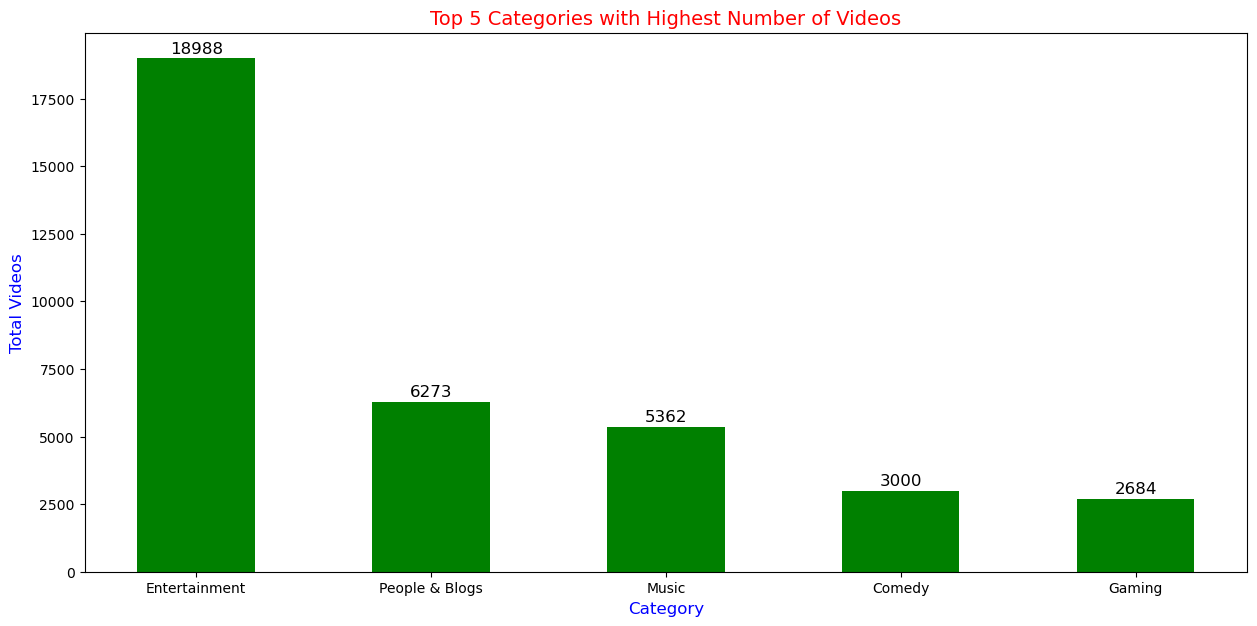

In [40]:
x = v1a['categoryTitle']
y = v1a['video_count']


plt.figure(figsize=(15, 7))               #plt.figure().set_figwidth(15)
plt.title("Top 5 Categories with Highest Number of Videos",fontsize=14,color='r')
plt.xlabel("Category",fontsize=12,color='b')
plt.ylabel("Total Videos",fontsize=12,color='b')
plt.bar(x,y,color="g", width=0.5)
for i, v in enumerate(y):
    plt.text(i,v+200, str(v), ha = 'center', size=12, color='black') #weight="bold"
    
plt.show()

## *2.1b. Top 5 Categories with highest number of channels*

In [41]:
v1b = youtube.groupby(["categoryTitle"])['channelTitle'].nunique().sort_values(ascending=False).reset_index().rename(columns={'channelTitle':'total_channels'}).head()
v1b

,categoryTitle,total_channels
0,Entertainment,1343
1,People & Blogs,762
2,Music,612
3,Comedy,271
4,News & Politics,257


### Matplotlib

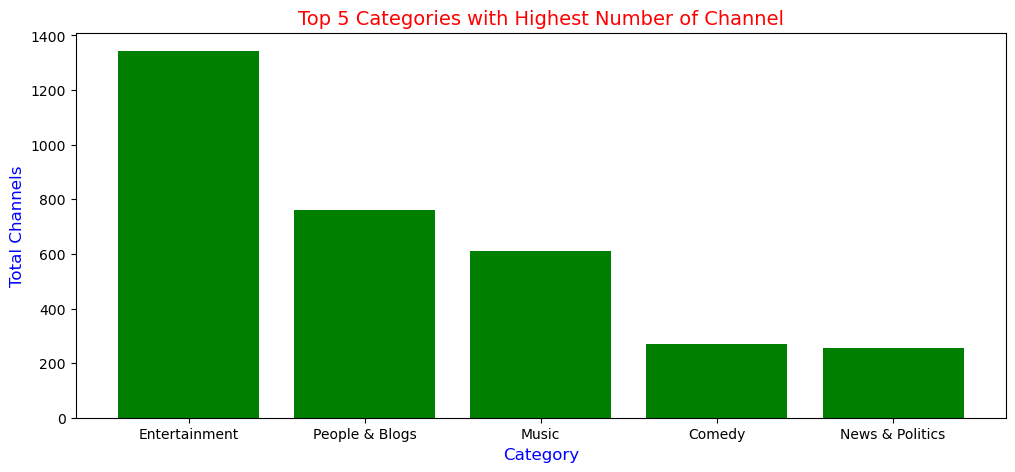

In [42]:
x = v1b['categoryTitle']
y = v1b['total_channels']

plt.figure(figsize=(12, 5))
plt.title("Top 5 Categories with Highest Number of Channel",fontsize=14,color='r')
plt.ylabel("Total Channels",fontsize=12,color='b')
plt.xlabel("Category",fontsize=12,color='b')
plt.bar(x,y,color='g')
plt.show()

## *2.2. Top 10 Channels with highest number of videos*

In [43]:
v2 = youtube.groupby(['channelTitle'])['video_id'].nunique().sort_values(ascending=False).head(10)
v2

channelTitle
Vijay Television      1103
Colors TV              877
Colors Rishtey         560
ZEE5                   540
Sony SAB               535
Sourav Joshi Vlogs     498
Asianet                493
Crazy XYZ              425
Sun TV                 314
HAR PAL GEO            296
Name: video_id, dtype: int64

### Pandas Plotting

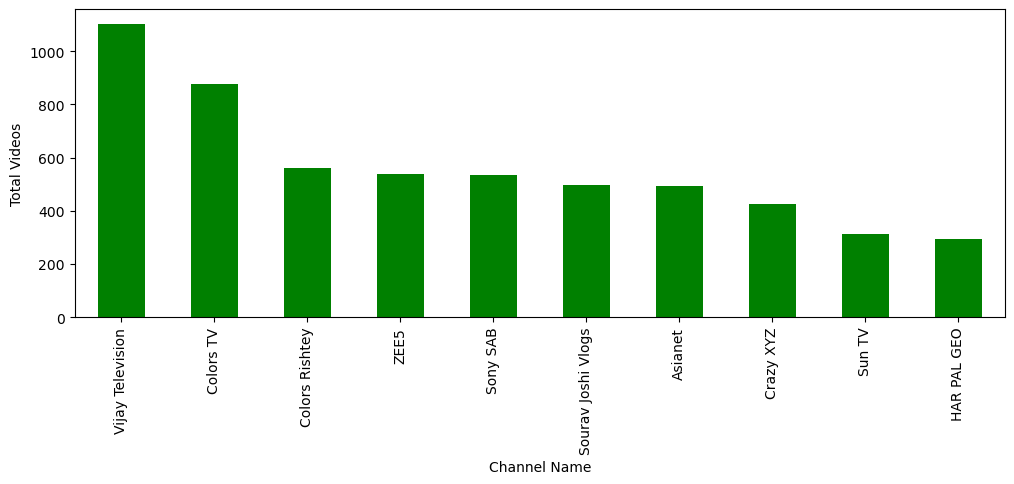

In [44]:
v2.plot(kind = 'bar', xlabel='Channel Name', ylabel='Total Videos', figsize=(12, 4), color='g')
plt.show()

## *2.3. Top 5 Most watched videos*

In [45]:
v3 = youtube.groupby(['videoTitle'])['view_count'].max().sort_values(ascending=False).head(5).reset_index()
v3

,videoTitle,view_count
0,BTS (방탄소년단) 'Butter' Official MV,264407389.0
1,BTS (방탄소년단) 'Dynamite' Official MV,253995993.0
2,Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...,202091414.0
3,BLACKPINK - ‘Pink Venom’ M/V,187922090.0
4,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248.0


### Matplotlib

/home/gaurav/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gaurav/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gaurav/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gaurav/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gaurav/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io,

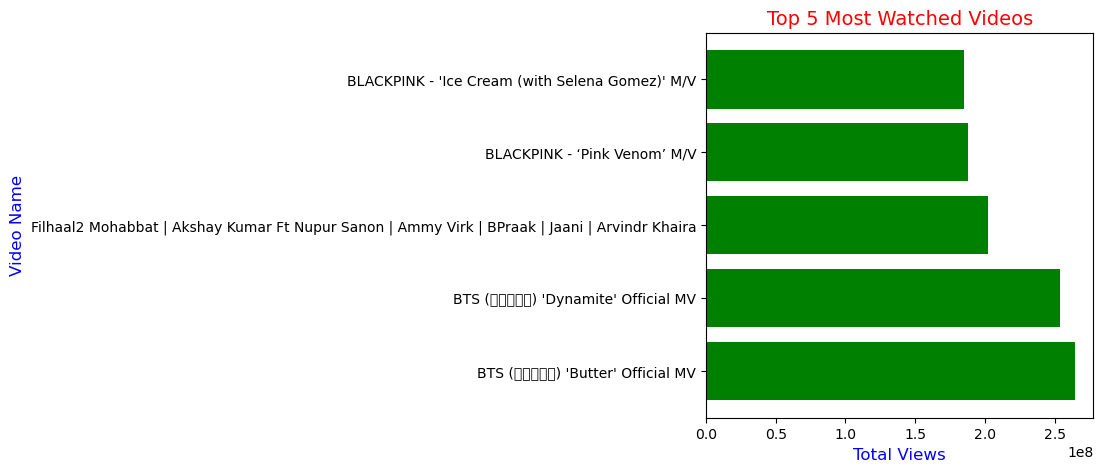

In [46]:
x = v3["videoTitle"]
y = v3["view_count"]

plt.figure(figsize=(5, 5))
plt.title("Top 5 Most Watched Videos",fontsize=14,color='r')
plt.ylabel("Video Name",fontsize=12,color='b')
plt.xlabel("Total Views",fontsize=12,color='b')
plt.barh(x,y,color='g')
plt.show()

## *2.4. MOM Trend for published videos*

Here, year & month column has data type of float and both has null values so we have to first remove null values then will convert datatype float to int.

In [47]:
v4 = youtube.groupby(["month"])["video_id"].nunique().reset_index().rename(columns={"video_id" :"published_videos"}) #.sort_values(by=["video_id"],ascending=False)
v4

,month,published_videos
0,1,3163
1,2,2840
2,3,3235
3,4,3154
4,5,2860
5,6,3129
6,7,3289
7,8,4356
8,9,4896
9,10,5197


### Matplotlib

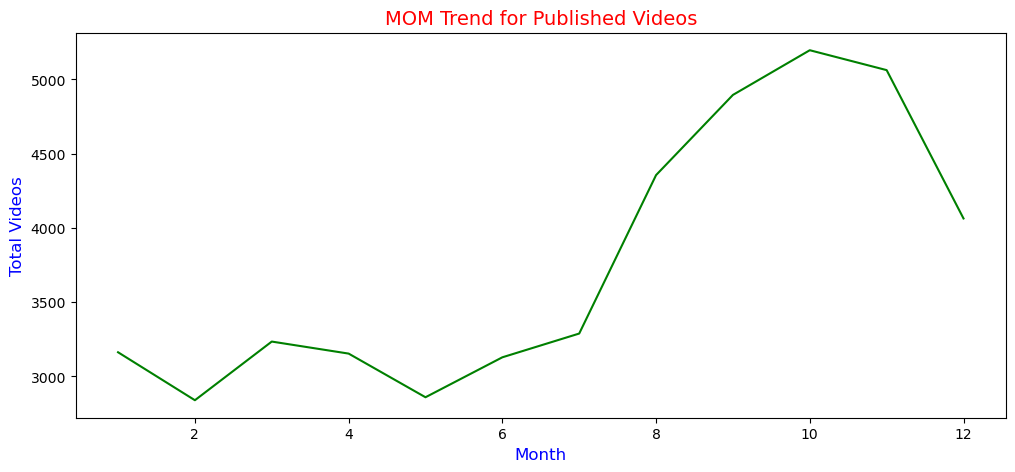

In [48]:
x = v4["month"]
y = v4["published_videos"]

plt.figure(figsize=(12,5))
plt.title("MOM Trend for Published Videos",color='r',size=14)
plt.xlabel("Month",color='b',size=12)
plt.ylabel("Total Videos",color='b',size=12)
plt.plot(x,y,color="g")
plt.show()

## *2.5. MOM Trend for published videos for years*

In [49]:
v5 = youtube.groupby(["year","month"])["video_id"].nunique().reset_index() 
v5

,year,month,video_id
0,2020,7,1
1,2020,8,1150
2,2020,9,1585
3,2020,10,1743
4,2020,11,1503
5,2020,12,1636
6,2021,1,1564
7,2021,2,1482
8,2021,3,1722
9,2021,4,1601


### Matplotlib

In [50]:
# x = v4["month"]
# y = v4["video_id"]


# # plt.title("MOM Trend")
# # plt.xlabel("month")
# # plt.ylabel("total videos")
# plt.figure(figsize=(12,4))
# plt.plot(x,y,color="g")
# plt.show()

### Pandas Plotting

year
2020    AxesSubplot(0.125,0.11;0.775x0.77)
2021    AxesSubplot(0.125,0.11;0.775x0.77)
2022    AxesSubplot(0.125,0.11;0.775x0.77)
Name: video_id, dtype: object

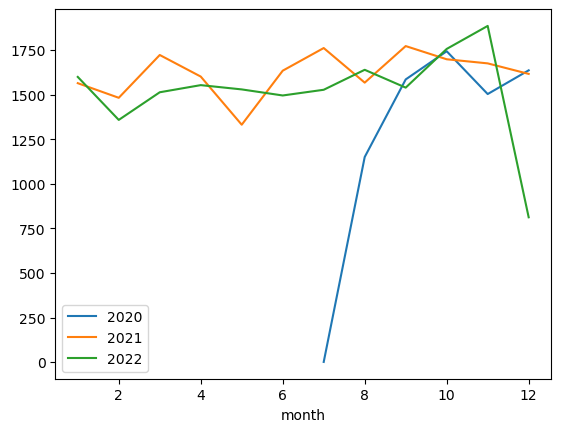

In [51]:
v5.set_index('month', inplace=True)
v5.groupby('year')['video_id'].plot(legend=True)

## 2.6. Distrubution of Videos over Years

In [52]:
v6 = youtube.groupby(['year'])['video_id'].nunique().reset_index().rename(columns={"video_id" :"total_videos"})
v6

,year,total_videos
0,2020,7618
1,2021,19423
2,2022,18205


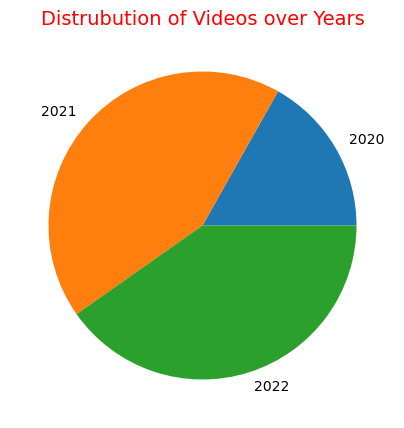

In [53]:
x = v6["year"]
y = v6["total_videos"]

plt.figure(figsize=(12,5))
plt.title("Distrubution of Videos over Years",color='r',size=14)
                                                                      #mycolors = ["orange", "blue", "green", ]
plt.pie(y, labels = x)                                                #, colors = mycolors)
#plt.legend(title = "Years:")
plt.show()

In [55]:
list(youtube.columns)

['categoryId',
 'categoryTitle',
 'video_id',
 'videoTitle',
 'publishedAt',
 'channelId',
 'channelTitle',
 'trending_date',
 'tags',
 'view_count',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'description',
 'year',
 'month']

## *2.7. Most liked videos*

In [60]:
v7 = youtube.groupby(["videoTitle"])["likes"].max().sort_values(ascending=False).reset_index().head(10)
v7

,videoTitle,likes
0,BTS (방탄소년단) 'Dynamite' Official MV,16115240.0
1,BTS (방탄소년단) 'Butter' Official MV,16021542.0
2,BTS (방탄소년단) 'Permission to Dance' Official MV,12225971.0
3,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,11795683.0
4,BLACKPINK - ‘Pink Venom’ M/V,11640133.0
5,LISA - 'LALISA' M/V,11534039.0
6,BTS (방탄소년단) 'Life Goes On' Official MV,11405033.0
7,"$456,000 Squid Game In Real Life!",10656330.0
8,BTS (방탄소년단) 'Yet To Come (The Most Beautiful M...,9366425.0
9,BLACKPINK – ‘Lovesick Girls’ M/V,9217879.0


## *2.8. Most disliked videos*

In [59]:
v8 = youtube.groupby(["videoTitle"])["dislikes"].max().sort_values(ascending=False).reset_index().head(10)
v8

,videoTitle,dislikes
0,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,12341474.0
1,Khaali Peeli | Teaser | Ishaan | Ananya Panday...,1733752.0
2,Prime Minister Narendra Modi's Mann Ki Baat wi...,1229004.0
3,Chocolate - Tony Kakkar ft. Riyaz Aly & Avneet...,1152531.0
4,"Beyonse Sharma Jayegi - Khaali Peeli | Ishaan,...",1098465.0
5,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,879354.0
6,"Beyonce Sharma Jayegi - Khaali Peeli | Ishaan,...",786926.0
7,BTS (방탄소년단) 'Dynamite' Official MV,756696.0
8,Tehas Nehas - Khaali Peeli | Ishaan & Ananya |...,401622.0
9,Ishq Kamaal – Sadak 2 | Javed Ali | Suniljeet-...,354290.0


In [62]:
v8.loc[v8['dislikes'] <= 1000000, 'status'] = 'Less'
v8.loc[v8['dislikes']  > 1000000, 'status'] = 'Greater'
v8

,videoTitle,dislikes,status
0,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,12341474.0,Greater
1,Khaali Peeli | Teaser | Ishaan | Ananya Panday...,1733752.0,Greater
2,Prime Minister Narendra Modi's Mann Ki Baat wi...,1229004.0,Greater
3,Chocolate - Tony Kakkar ft. Riyaz Aly & Avneet...,1152531.0,Greater
4,"Beyonse Sharma Jayegi - Khaali Peeli | Ishaan,...",1098465.0,Greater
5,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,879354.0,Less
6,"Beyonce Sharma Jayegi - Khaali Peeli | Ishaan,...",786926.0,Less
7,BTS (방탄소년단) 'Dynamite' Official MV,756696.0,Less
8,Tehas Nehas - Khaali Peeli | Ishaan & Ananya |...,401622.0,Less
9,Ishq Kamaal – Sadak 2 | Javed Ali | Suniljeet-...,354290.0,Less
